# Salaries Data Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
dataset=pd.read_csv("C:\\Users\\hp\\datascience\\datasets\\Salary_Data_Based_country_and_race.csv")

In [3]:
dataset.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [4]:
dataset.shape

(6704, 9)

In [5]:
# Dividing the dataset into X and y

In [6]:
y=dataset["Salary"]
X=dataset.drop(columns=["Salary"],axis=1)

In [7]:
X.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,USA,Asian


In [8]:
y.head()

0     90000.0
1     65000.0
2    150000.0
3     60000.0
4    200000.0
Name: Salary, dtype: float64

In [9]:
X.drop(columns=["Unnamed: 0"],axis=1,inplace=True)

In [10]:
X.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,USA,Asian


In [11]:
X.describe()

,Age,Years of Experience
count,6702.000000,6701.000000
mean,33.620859,8.094687
std,7.614633,6.059003
min,21.000000,0.000000
25%,28.000000,3.000000
50%,32.000000,7.000000
75%,38.000000,12.000000
max,62.000000,34.000000


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Country              6704 non-null   object 
 6   Race                 6704 non-null   object 
dtypes: float64(2), object(5)
memory usage: 366.8+ KB


In [13]:
# here we can see that age and years of experience are floating point data type while gender, education level, job title, country and race are categorical variables

In [14]:
X.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Country                0
Race                   0
dtype: int64

In [15]:
# here we can see that we have some null values in the given dataset for independent feature

In [16]:
y.isna().sum()

5

In [17]:
# we can also see that we have 5 null values for dependent feature

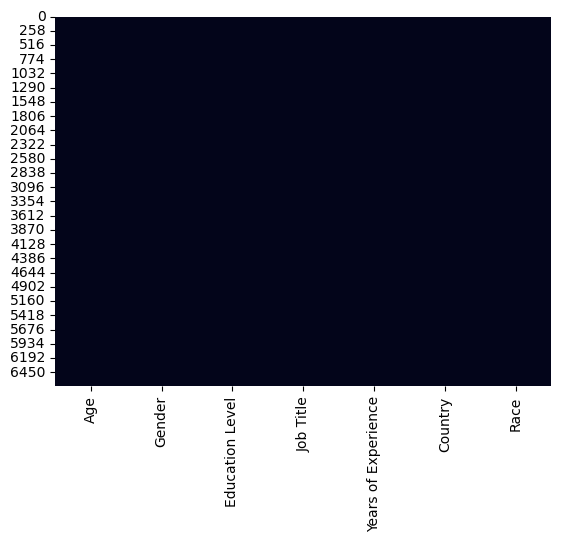

In [18]:
import seaborn as sns
sns.heatmap(X.isna(), cbar=False)
plt.show()

In [19]:
# finding missing value percent in dataset
print(round(X.isna().sum()*100/6704,2))
print("in dependent feature",round(y.isna().sum()*100/6704,2))

Age                    0.03
Gender                 0.03
Education Level        0.04
Job Title              0.03
Years of Experience    0.04
Country                0.00
Race                   0.00
dtype: float64
in dependent feature 0.07


In [20]:
# here we can see that we have missing values in age, gender, education level, job title, years of experience and in salary

In [21]:
X["Race"].value_counts()
X["Race"].unique()

array(['White', 'Hispanic', 'Asian', 'Korean', 'Chinese', 'Australian',
       'Welsh', 'African American', 'Mixed', 'Black'], dtype=object)

In [22]:
# for race column we have 10 distinct values

In [23]:
X["Gender"].unique()

array(['Male', 'Female', nan, 'Other'], dtype=object)

In [24]:
X["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', nan, "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [25]:
X["Job Title"].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [26]:
X["Country"].unique()

array(['UK', 'USA', 'Canada', 'China', 'Australia'], dtype=object)

<BarContainer object of 9 artists>

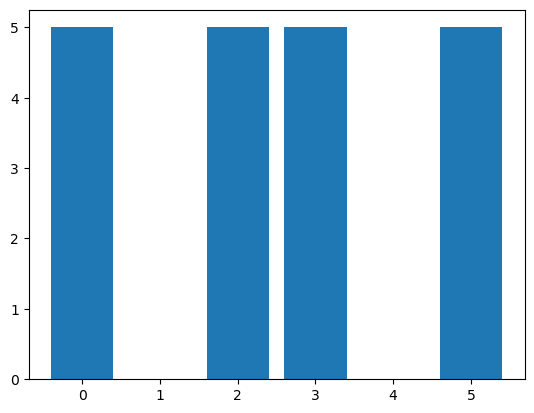

In [27]:
plt.bar(dataset.isna().sum(),5)

In [28]:
X["Age"].replace([np.nan],X["Age"].mode()[0],inplace=True)

In [29]:
X["Age"].isna().sum()

0

In [30]:
X["Education Level"].replace([np.nan],X["Education Level"].mode()[0],inplace=True)
X["Gender"].replace([np.nan],X["Gender"].mode()[0],inplace=True)
X["Years of Experience"].replace([np.nan],X["Years of Experience"].mode()[0],inplace=True)
X["Job Title"].replace([np.nan],X["Job Title"].mode()[0],inplace=True)

In [31]:
X.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Country                0
Race                   0
dtype: int64

In [32]:
y.replace([np.nan],y.mode()[0],inplace=True)

In [33]:
y.isna().sum()

0

In [34]:
# we have successfully removed the null values from the datset

In [35]:
dataset["Gender"]=X["Gender"]
dataset["Education Level"]=X["Education Level"]
dataset["Years of Experience"]=X["Years of Experience"]
dataset["Job Title"]=X["Job Title"]
dataset["Salary"]=y

In [36]:
dataset.isnull().sum()

Unnamed: 0             0
Age                    2
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

In [37]:
dataset.Age=X.Age

In [38]:
dataset.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

<Axes: xlabel='Age', ylabel='Salary'>

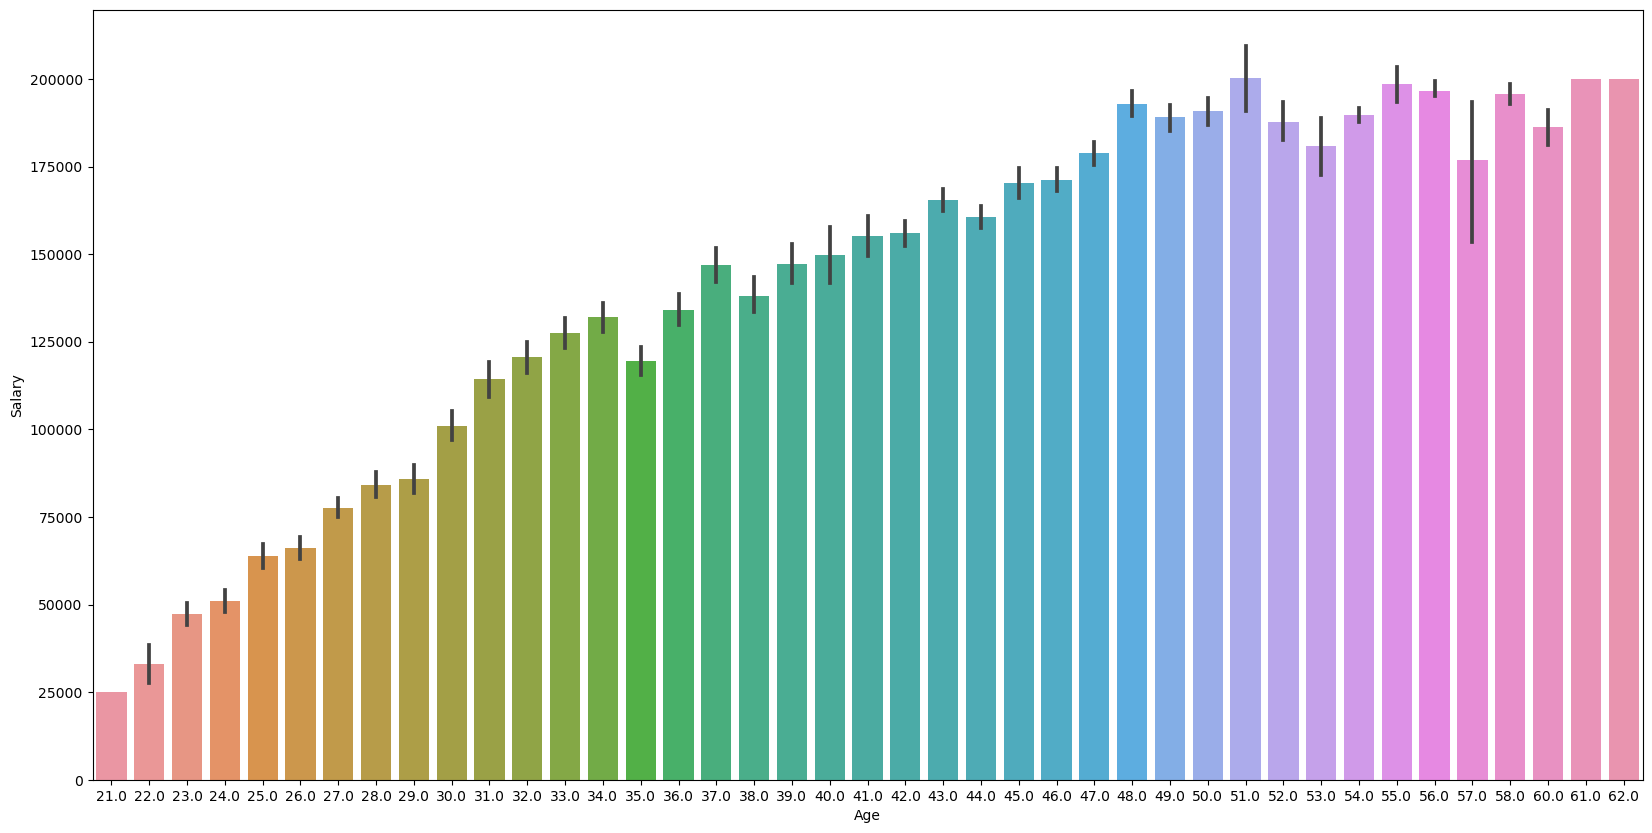

In [39]:
plt.figure(figsize=(20,10))
sns.barplot(x="Age",y="Salary",data=dataset)

In [40]:
## as the age increases the salary also increases

<Axes: xlabel='Age', ylabel='Salary'>

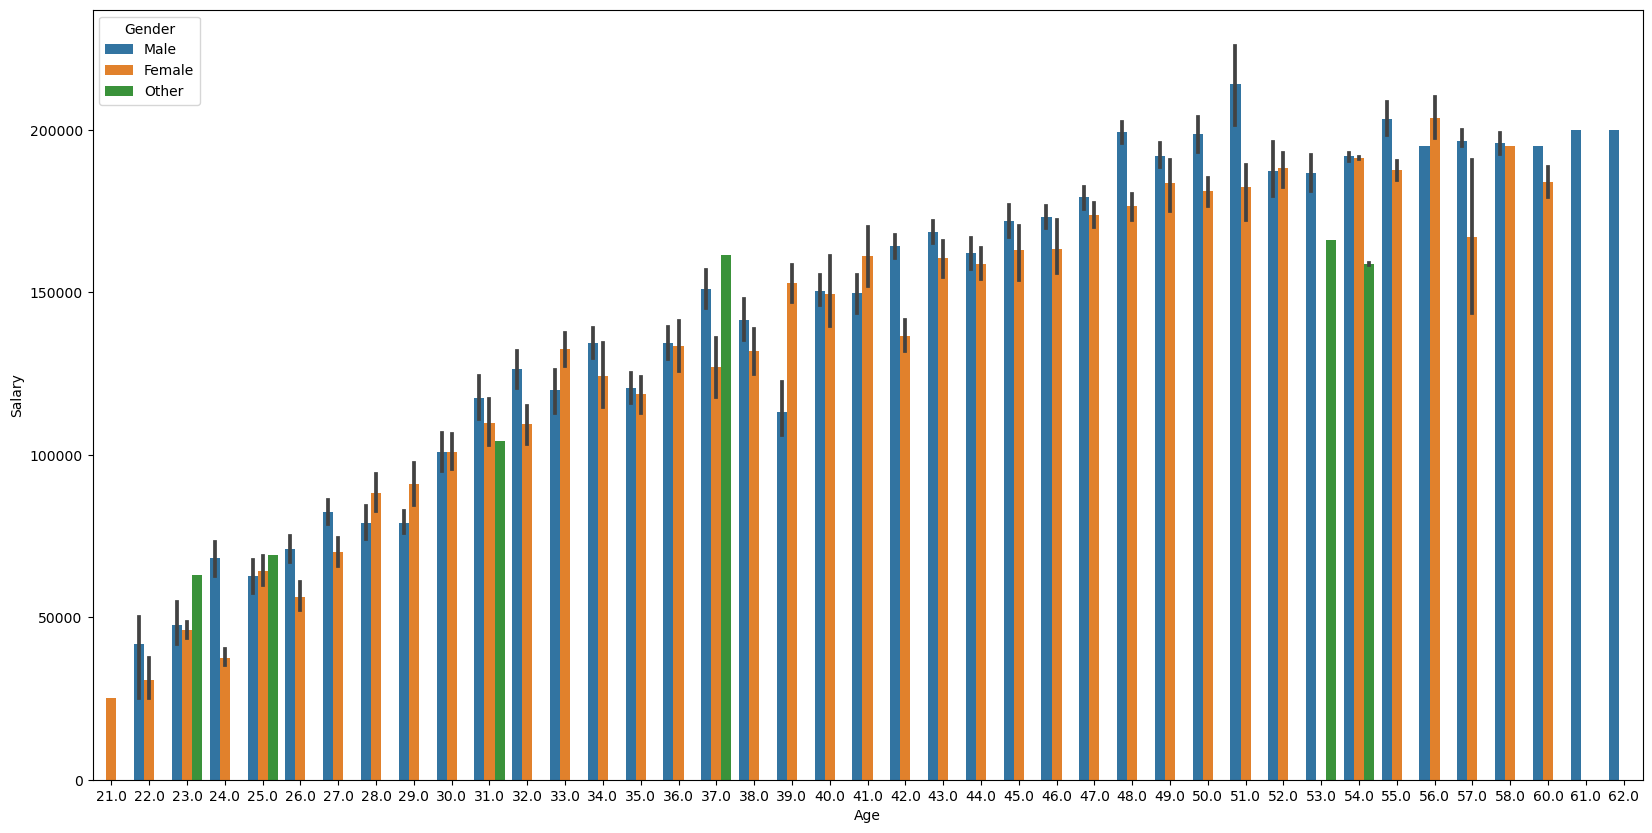

In [41]:
plt.figure(figsize=(20,10))
sns.barplot(x="Age",y="Salary",hue="Gender",data=dataset)

In [42]:
## Male earns more than women and other

<Axes: xlabel='Education Level', ylabel='Salary'>

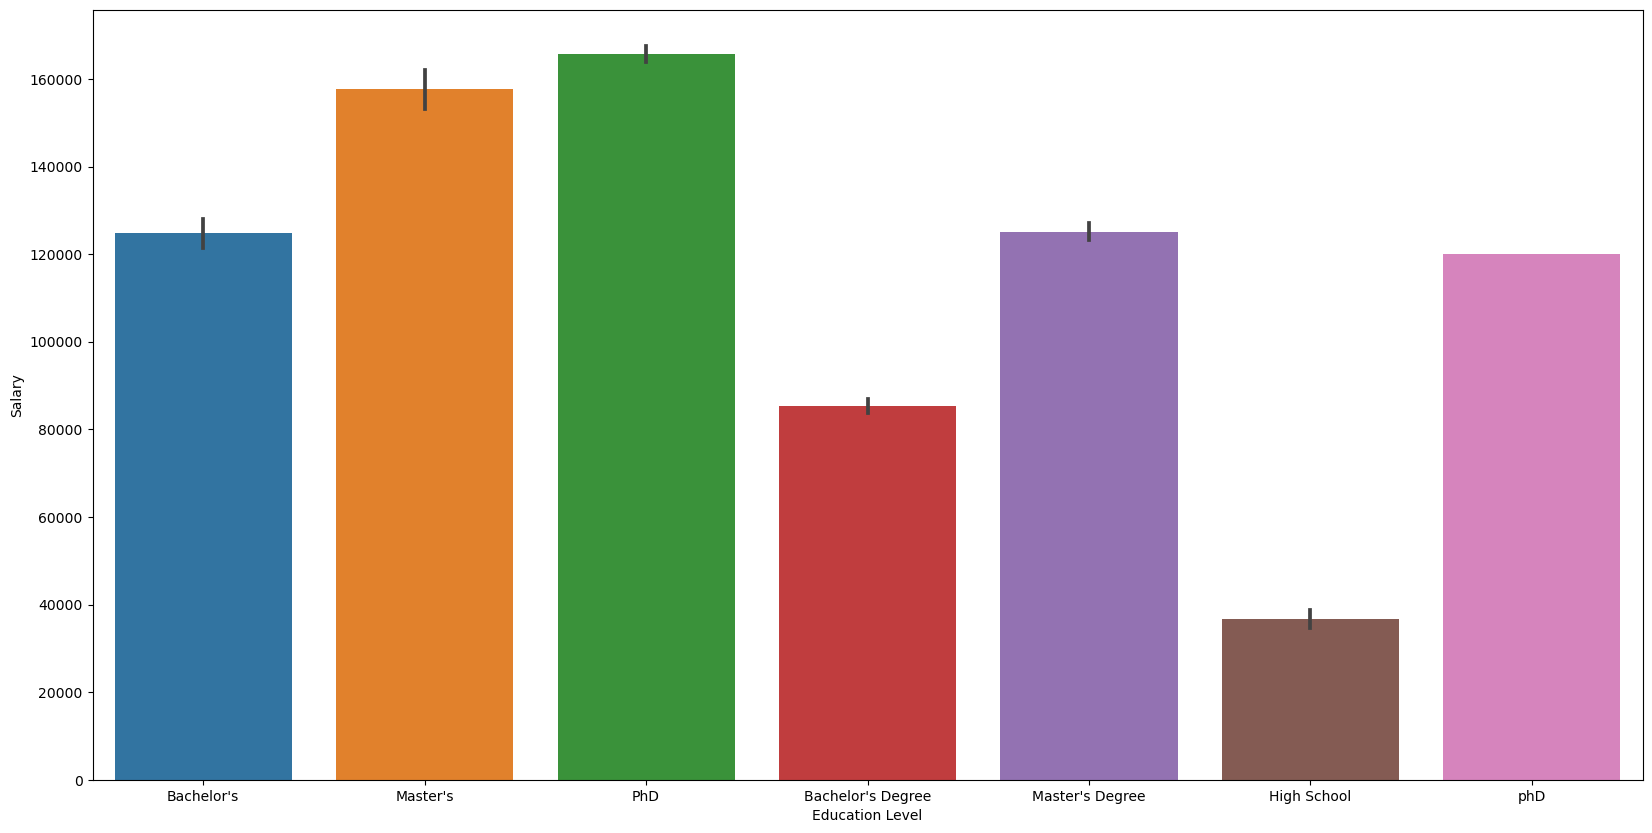

In [43]:
plt.figure(figsize=(20,10))
sns.barplot(x="Education Level",y="Salary",data=dataset)

In [44]:
## as the education level increases the salary also gets increased

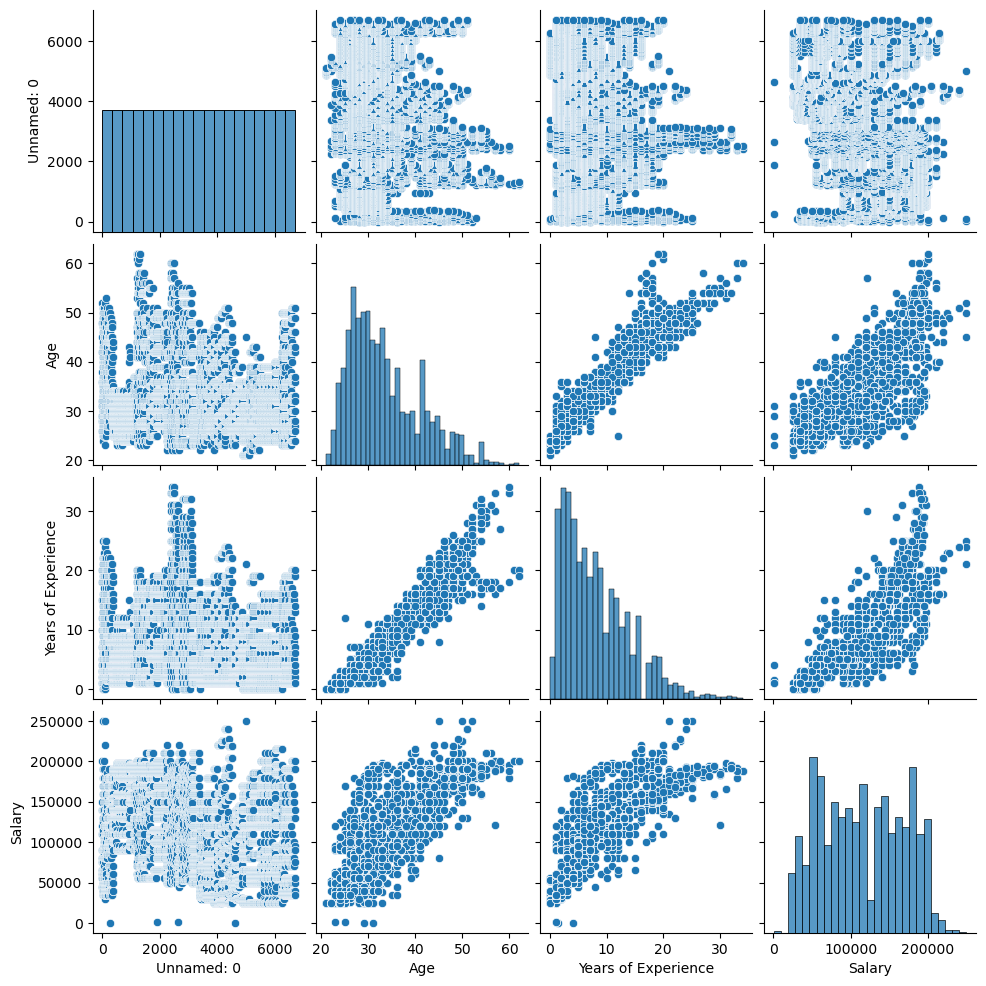

In [45]:
sns.pairplot(dataset)

In [46]:
dataset.drop(["Unnamed: 0"],axis=1,inplace=True)

In [126]:
X.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,USA,Asian


In [47]:
X["Gender"]=X["Gender"].map({'Male':0,'Female':1,'Other':2})

In [48]:
X.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
0,32.0,0,Bachelor's,Software Engineer,5.0,UK,White
1,28.0,1,Master's,Data Analyst,3.0,USA,Hispanic
2,45.0,0,PhD,Senior Manager,15.0,Canada,White
3,36.0,1,Bachelor's,Sales Associate,7.0,USA,Hispanic
4,52.0,0,Master's,Director,20.0,USA,Asian


In [49]:
X["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [50]:
X["Education Level"]=X["Education Level"].map({"High School":1,"Bachelor's":2,"Bachelor's Degree":2,"Master's":3,"Master's Degree":3,"phD":4,"PhD":4})

In [51]:
X.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
0,32.0,0,2,Software Engineer,5.0,UK,White
1,28.0,1,3,Data Analyst,3.0,USA,Hispanic
2,45.0,0,4,Senior Manager,15.0,Canada,White
3,36.0,1,2,Sales Associate,7.0,USA,Hispanic
4,52.0,0,3,Director,20.0,USA,Asian


In [52]:
job_title=X.drop(["Job Title"],axis=1)

In [53]:
X.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
0,32.0,0,2,Software Engineer,5.0,UK,White
1,28.0,1,3,Data Analyst,3.0,USA,Hispanic
2,45.0,0,4,Senior Manager,15.0,Canada,White
3,36.0,1,2,Sales Associate,7.0,USA,Hispanic
4,52.0,0,3,Director,20.0,USA,Asian


In [54]:
X.drop("Job Title",axis=1,inplace=True)

In [55]:
X.head()

,Age,Gender,Education Level,Years of Experience,Country,Race
0,32.0,0,2,5.0,UK,White
1,28.0,1,3,3.0,USA,Hispanic
2,45.0,0,4,15.0,Canada,White
3,36.0,1,2,7.0,USA,Hispanic
4,52.0,0,3,20.0,USA,Asian


In [56]:
X.Country.value_counts()

USA          1360
China        1343
UK           1337
Australia    1336
Canada       1328
Name: Country, dtype: int64

In [57]:
X["Country"]=X["Country"].map({"USA":1,"China":2,"UK":3,"Australia":4,"Canada":5})

In [58]:
X.head()

,Age,Gender,Education Level,Years of Experience,Country,Race
0,32.0,0,2,5.0,3,White
1,28.0,1,3,3.0,1,Hispanic
2,45.0,0,4,15.0,5,White
3,36.0,1,2,7.0,1,Hispanic
4,52.0,0,3,20.0,1,Asian


In [59]:
X["Race"].unique()

array(['White', 'Hispanic', 'Asian', 'Korean', 'Chinese', 'Australian',
       'Welsh', 'African American', 'Mixed', 'Black'], dtype=object)

In [60]:
X["Country"].unique()

array([3, 1, 5, 2, 4], dtype=int64)

In [61]:
X["Race"]=X["Race"].map({'White':1,'Hispanic':2,'Asian':3,'Korean':4,'Chinese':5,'Australian':6,'Welsh':7,'African American':8
                        ,'Mixed':9,'Black':10})

In [62]:
X.head()

,Age,Gender,Education Level,Years of Experience,Country,Race
0,32.0,0,2,5.0,3,1
1,28.0,1,3,3.0,1,2
2,45.0,0,4,15.0,5,1
3,36.0,1,2,7.0,1,2
4,52.0,0,3,20.0,1,3


In [63]:
X["Race"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

<BarContainer object of 6704 artists>

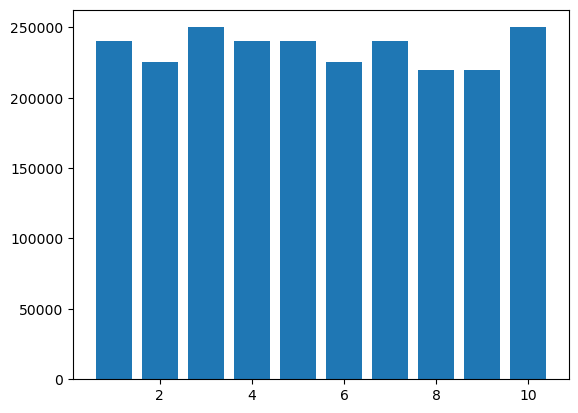

In [64]:
plt.bar(X["Race"],y)

<Axes: >

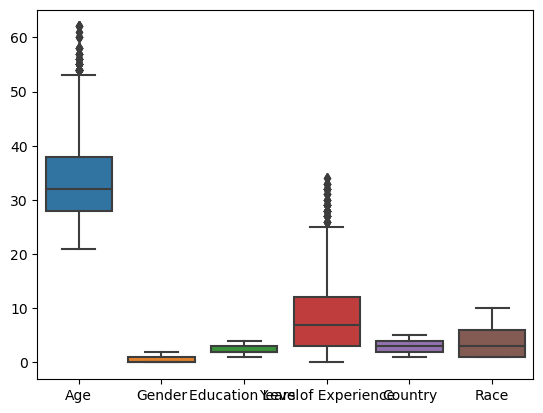

In [65]:
sns.boxplot(X)

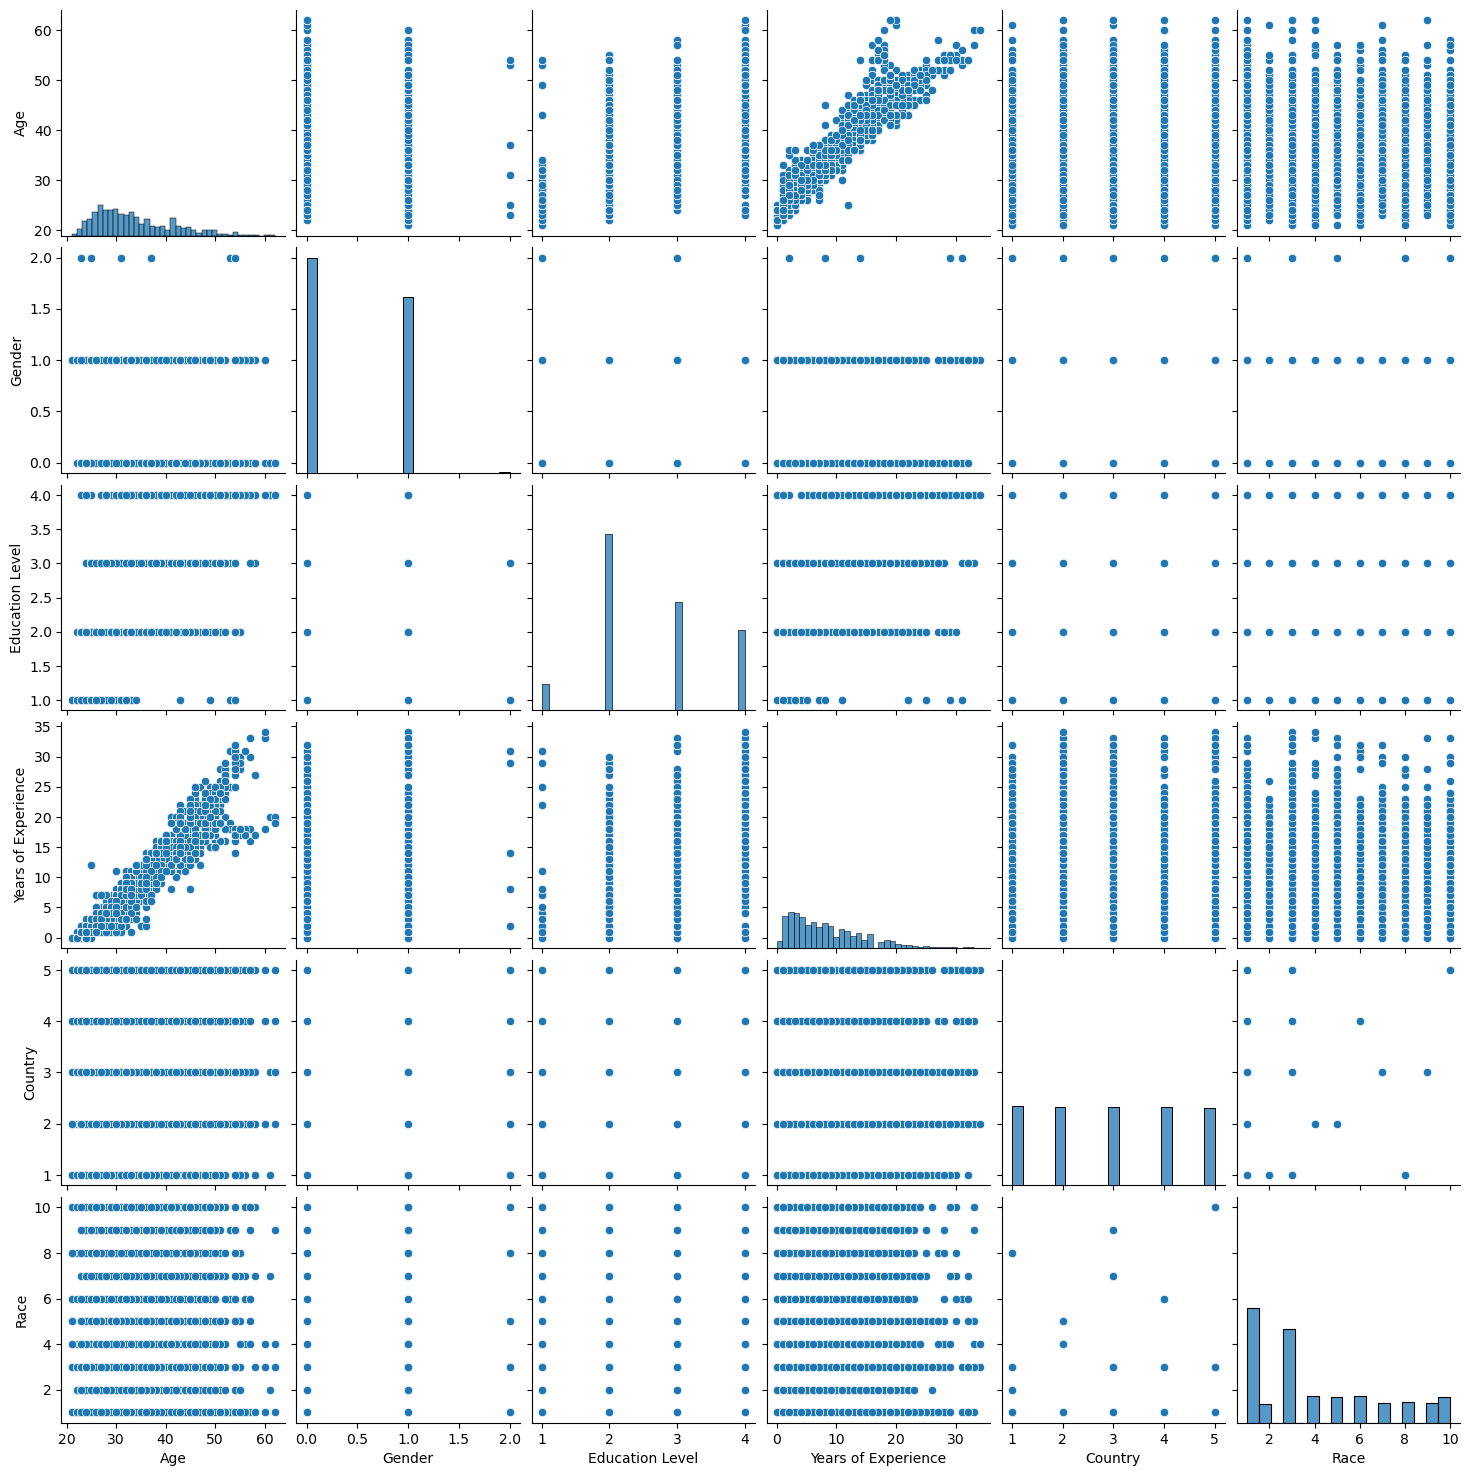

In [66]:
sns.pairplot(X)

In [67]:
X.isna().sum()

Age                    0
Gender                 0
Education Level        0
Years of Experience    0
Country                0
Race                   0
dtype: int64

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
sc=StandardScaler()

In [72]:
X_train=sc.fit_transform(X_train)

In [73]:
X_test=sc.transform(X_test)

In [74]:
X_train

array([[ 0.56898165, -0.914837  ,  0.42672554,  0.96577901,  1.42258051,
         2.07134018],
       [-0.60839352,  1.0757313 , -0.70457576, -0.67935499, -1.39652994,
        -0.69486099],
       [-0.60839352, -0.914837  , -0.70457576, -0.67935499,  1.42258051,
         2.07134018],
       ...,
       [-0.87003245, -0.914837  , -0.70457576, -0.84386839,  0.01302528,
         1.03401474],
       [-0.3467546 ,  1.0757313 , -0.70457576, -0.67935499,  0.71780289,
        -0.34908584],
       [-1.26249084, -0.914837  , -0.70457576, -1.17289518, -1.39652994,
        -0.69486099]])

In [75]:
X_test

array([[ 1.22307896,  1.0757313 ,  1.55802684,  1.788346  , -0.69175233,
        -1.04063613],
       [ 0.04570379, -0.914837  ,  0.42672554, -0.02130139,  0.01302528,
         1.03401474],
       [-0.87003245, -0.914837  , -0.70457576, -0.84386839,  1.42258051,
        -0.34908584],
       ...,
       [-0.47757406, -0.914837  ,  1.55802684, -0.35032819,  0.01302528,
        -0.34908584],
       [-0.3467546 , -0.914837  , -0.70457576, -0.02130139, -0.69175233,
        -0.0033107 ],
       [ 1.61553735, -0.914837  ,  1.55802684,  1.2948058 , -0.69175233,
         0.34246445]])

## Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
reg=LinearRegression().fit(X_train,y_train)

In [78]:
y_pred=reg.predict(X_test)

In [79]:
from sklearn.metrics import mean_squared_error
score=mean_squared_error(y_pred,y_test)
score

826970192.4870269

In [80]:
reg.score(X_test,y_test)

0.6978497146666983

## Lasso Regression

In [93]:
from sklearn.linear_model import Lasso
lassoReg=Lasso(alpha=0.5)

In [94]:
lassoReg.fit(X_train,y_train)

Lasso(alpha=0.5)

In [95]:
lassoReg.score(X_test,y_test)

0.6978496259179645

## Ridge Regression

In [96]:
from sklearn.linear_model import Ridge
ridgeReg=Ridge(alpha=0.5,random_state=42)

In [97]:
ridgeReg.fit(X_train,y_train)

Ridge(alpha=0.5, random_state=42)

In [98]:
ridgeReg.score(X_test,y_test)

0.6978551765071909

In [99]:
ridgeYPredict=ridgeReg.predict(X_test)

In [100]:
ridgeScore=mean_squared_error(ridgeYPredict,y_test)

In [101]:
ridgeScore

826955243.7032503

## Elastic net

In [103]:
from sklearn.linear_model import ElasticNet
elasticReg=ElasticNet(random_state=0)

In [104]:
elasticReg.fit(X_train,y_train)

ElasticNet(random_state=0)

In [105]:
elasticReg.score(X_test,y_test)

0.6420710541821701